<a href="https://colab.research.google.com/github/victorm0202/emed22/blob/main/16_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2021 <center>

# AdaBoost

Ve la documentación de `sklearn`. Los parámetros importantes son, el clasificador débil, el número de iteraciones boosting y el algoritmo, que en general, usa SAMME (Ji Zhu et al., 2006).

SAMME es versión discreta, el otro la versión *real*, es decir, calcula probabilidades.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
#plt.style.use('seaborn')

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200, random_state=42)

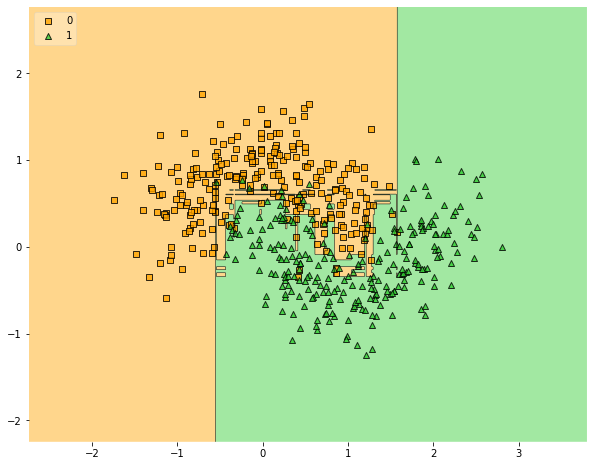

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
plot_decision_regions(X, y, clf=ada_clf, legend=2, colors='orange,limegreen')
plt.show()

Puedes hacer boosting con cualquier clasificador base. Solo como ilustración, ve lo que sucede usando una SVM con kernel Gaussiano

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

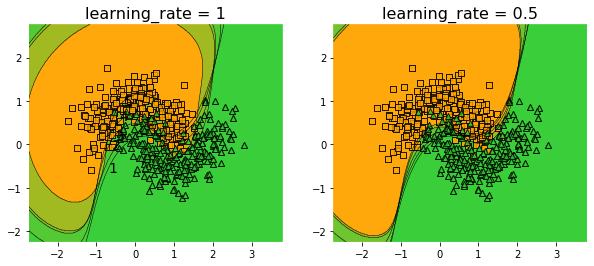

In [ ]:
from sklearn.svm import SVC
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_regions(X, y, clf=svm_clf, legend=0, colors='orange,limegreen')
        #plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

## Usamos el conjunto de datos Cancer para compararlo con CART

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X, y = load_breast_cancer(return_X_y=True)
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #42

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.986


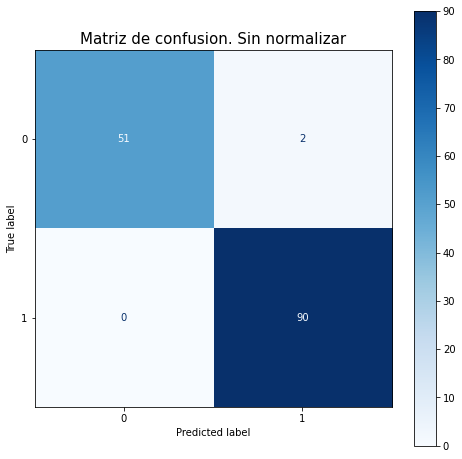

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
disp1 = metrics.plot_confusion_matrix(ada, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [ ]:
y_hat = ada.predict(X_test)
metrics.confusion_matrix(y_test, y_hat)

array([[51,  2],
       [ 0, 90]])

## Comparación entre SAMME y SAMME.R (Zhu et al., 2006)

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score

X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
                               n_classes=3, random_state=1)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=600)

In [ ]:
real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

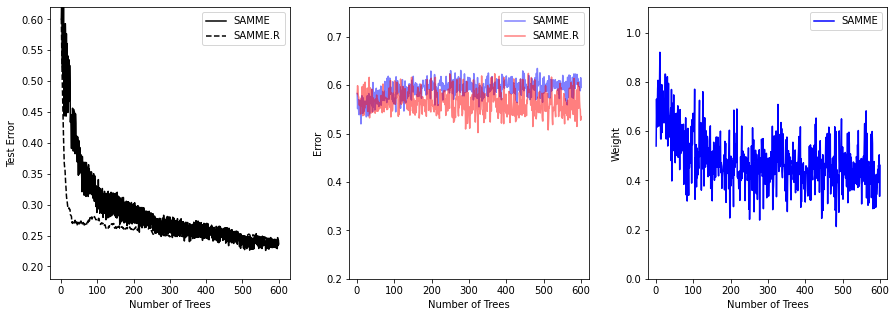

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1), real_test_errors, c='black', linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors, "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors, "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()